In [260]:
import pandas as pd
import numpy as np
import qgrid
qgrid.nbinstall(overwrite=True)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

## Input data

In [28]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [29]:
train['source']='train'
test['source']='test'

#### Combine train and test DataFrame

In [30]:
combine=pd.concat([train,test],ignore_index=True)

In [31]:
print (train.shape,test.shape,combine.shape)

(614, 14) (367, 13) (981, 14)


In [32]:
train.loc[(train["Gender"]=="Female") & (train["Education"]=="Not Graduate") & (train["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [33]:
combine.apply(lambda x: sum(x.isnull()),axis=0)

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

## Data Manipulation

In [34]:
combine.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

#### Revise Data Types

In [35]:
combine.Loan_Amount_Term=combine.Loan_Amount_Term.astype(str)
combine.Credit_History=combine.Credit_History.astype(str)

In [36]:
combine.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History        object
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term      object
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

In [249]:
#Filter Categorical variables
categorical_variables=[x for x in combine.dtypes.index if combine.dtypes[x]=='object']
categorical_variables=[x for x in categorical_variables if x not in ['source','Loan_Status','Loan_ID']]

                       
for col in categorical_variables:
    print ('\nFrequency of Categories for Variables %s' %col)
    print (combine[col].value_counts())


Frequency of Categories for Variables Credit_History
1.0    754
0.0    148
nan     79
Name: Credit_History, dtype: int64

Frequency of Categories for Variables Dependents
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

Frequency of Categories for Variables Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequency of Categories for Variables Gender
Male      799
Female    182
Name: Gender, dtype: int64

Frequency of Categories for Variables Loan_Amount_Term
360.0    823
180.0     66
480.0     23
nan       20
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
6.0        1
350.0      1
Name: Loan_Amount_Term, dtype: int64

Frequency of Categories for Variables Married
Yes    634
No     347
Name: Married, dtype: int64

Frequency of Categories for Variables Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequency of Categories for Variables S

In [38]:
#data.apply(lambda x: sum(x.isnull()),axis=1).head()

#### Fill Missing value for Gender Educaton Self_Employed

In [39]:
#import stats.mode to determine the mode of column
from scipy import stats
from scipy.stats import mode

In [40]:
#This returns both mode and count.
stats.mode(combine['Gender'].dropna())

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['Male'], dtype=object), count=array([775]))

In [41]:
Gmode=stats.mode(combine['Gender'].dropna()).mode[0]
Mmode=stats.mode(combine['Married'].dropna()).mode[0]
Emode=stats.mode(combine['Self_Employed'].dropna()).mode[0]

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [42]:
#fill the missing values for Gender

combine['Gender'].fillna(Gmode,inplace=True)
combine['Married'].fillna(Mmode,inplace=True)
combine['Self_Employed'].fillna(Emode,inplace=True)

In [43]:
#Check whether the missing values imputed successfully
combine.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

In [44]:
combine_clean=combine.dropna(subset=['Loan_Amount_Term'])

In [45]:
combine_clean.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents            25
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

In [46]:
combine_clean.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History        object
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term      object
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

#### Create New Category in term of Loan_Amount_Term

In [47]:
combine_clean.Loan_Amount_Term.replace('nan',np.nan,inplace=True)

In [48]:
loan_amount_term_mode=combine_clean.pivot_table(values='Loan_Amount_Term',index='Married',aggfunc=(lambda
                      x: mode(x.dropna()).mode[0]))

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [49]:
loan_amount_bool=combine_clean.Loan_Amount_Term.isnull()

In [50]:
combine_clean.loc[loan_amount_bool,'Loan_Amount_Term']=combine_clean.loc[loan_amount_bool,'Married'].apply(lambda x:
                                                       loan_amount_term_mode[0])

In [51]:
combine_clean.Loan_Amount_Term.value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
6.0        1
350.0      1
Name: Loan_Amount_Term, dtype: int64

In [52]:
combine_clean['Loan_Amount_Term_Combined']=\
        combine_clean['Loan_Amount_Term'].map(
    {'180.0':'short',
     '240.0':'short',
     '300.0':'short',
     '84.0':'short',
     '120.0':'short',
     '60.0':'short',
     '36.0':'short',
     '12.0':'short',
     '6.0':'short',
     '360.0':'long',
     '350.0':'long',
     '480.0':'long'})

In [53]:
combine_clean['Loan_Amount_Term_Combined'].value_counts()

long     867
short    114
Name: Loan_Amount_Term_Combined, dtype: int64

#### Fill in Dependents by Mode value

In [54]:
from scipy.stats import mode
dependents_mode=combine_clean.pivot_table(values=
        'Dependents',index='Education',
        aggfunc=(lambda x: mode(x.dropna()).mode[0]))

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [55]:
dependents_mode

Education
Graduate        0
Not Graduate    0
Name: Dependents, dtype: object

In [56]:
miss_dependents_bool=combine_clean['Dependents'].isnull()

In [57]:
combine_clean.loc[miss_dependents_bool,'Dependents']=combine_clean.loc[miss_dependents_bool,
                               'Education'].apply(lambda x: dependents_mode[x])

#### Fill in Credit_History by Mode value

In [58]:
combine_clean.Credit_History.replace('nan',np.nan,inplace=True)

In [59]:
credit_mode=combine_clean.pivot_table(values='Credit_History',index='Married',aggfunc=(lambda x:
                                                                                      mode(x.dropna()).mode[0]))

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [60]:
credit_mode

Married
No     1.0
Yes    1.0
Name: Credit_History, dtype: object

In [61]:
miss_credit_bool=combine_clean.Credit_History.isnull()

In [62]:
combine_clean.loc[miss_credit_bool,'Credit_History']=combine_clean.loc[miss_credit_bool,'Married'].apply(lambda x:
                                                     credit_mode[x])

##### ~~combine_clean.loc[(combine_clean.Credit_History.isnull())&(combine_clean.Married=='Yes'),'Credit_History']=1~~

In [63]:
combine_clean.Credit_History.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [64]:
combine_clean.apply(lambda x: sum(x.isnull()))

ApplicantIncome                0
CoapplicantIncome              0
Credit_History                 0
Dependents                     0
Education                      0
Gender                         0
LoanAmount                    27
Loan_Amount_Term               0
Loan_ID                        0
Loan_Status                  367
Married                        0
Property_Area                  0
Self_Employed                  0
source                         0
Loan_Amount_Term_Combined      0
dtype: int64

##### ~~combine_clean=combine_clean.dropna(subset=['Loan_Amount_Term_Combined'])~~

In [65]:
#combine['Loan_Amount_Term']=combine.groupby(['Gender','Married']).transform(lambda
#                            x: x.fillna(x.mode()[0]))['Loan_Amount_Term']

In [66]:
#combine.apply(lambda x: sum(x.isnull()))

####  Fill in missing value for LoanAmount by mean of *Gender*, **Married** and **self_Employed**

In [67]:
#Imput missing values for numerical variables
#Create pivot table 
#impute_groups=data.pivot_table(values=['LoanAmount'],
#              index=['Gender','Married','Self_Employed'],
#              aggfunc=np.mean)
# groupby is faster than pivot_table
impute_groups=combine_clean.groupby(['Gender','Married','Self_Employed'])['LoanAmount'].mean()

In [68]:
print (impute_groups)

Gender  Married  Self_Employed
Female  No       No               114.527778
                 Yes              138.714286
        Yes      No               136.903846
                 Yes              282.250000
Male    No       No               126.601036
                 Yes              163.960000
        Yes      No               150.286598
                 Yes              164.041096
Name: LoanAmount, dtype: float64


In [69]:
for i,row in combine_clean.loc[combine_clean['LoanAmount'].isnull(),:].iterrows():
    ind=tuple([row['Gender'],row['Married'],row['Self_Employed']])
    combine_clean.loc[i,'LoanAmount']=impute_groups.loc[ind]
   
    
    
    

In [70]:
combine_clean.apply(lambda x: sum(x.isnull()))

ApplicantIncome                0
CoapplicantIncome              0
Credit_History                 0
Dependents                     0
Education                      0
Gender                         0
LoanAmount                     0
Loan_Amount_Term               0
Loan_ID                        0
Loan_Status                  367
Married                        0
Property_Area                  0
Self_Employed                  0
source                         0
Loan_Amount_Term_Combined      0
dtype: int64

In [71]:
combine_clean.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.557312
std,5695.104533,2718.772806,76.374619
min,0.000000,0.000000,9.000000
25%,2875.000000,0.000000,101.000000
50%,3800.000000,1110.000000,128.000000
75%,5516.000000,2365.000000,160.000000
max,81000.000000,41667.000000,700.000000


## Data Clean Done

# Further Exploratory

Test

In [72]:
#combine_clean.keys() is the same as combine_clean.dtypes.index

In [73]:
#from math import * 
import math as m

In [74]:
m.factorial(5)

120

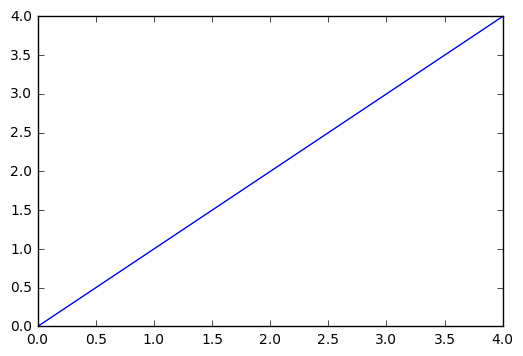

In [75]:
plt.plot(range(5))

#### Distribution Analysis

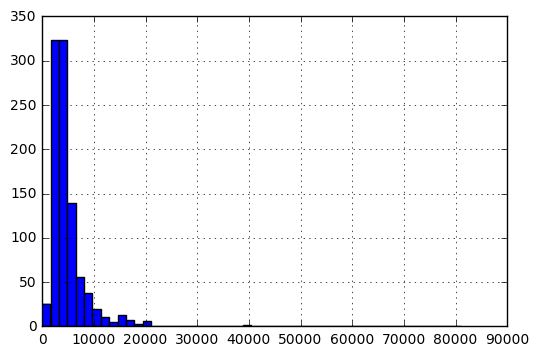

In [76]:
#Histogram Distribution
combine_clean['ApplicantIncome'].hist(bins=50)

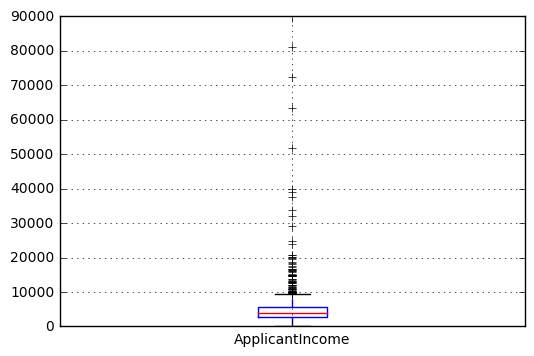

In [77]:
#Box plots to understand the disctributions to confirm Outliers
combine_clean.boxplot(column='ApplicantIncome')

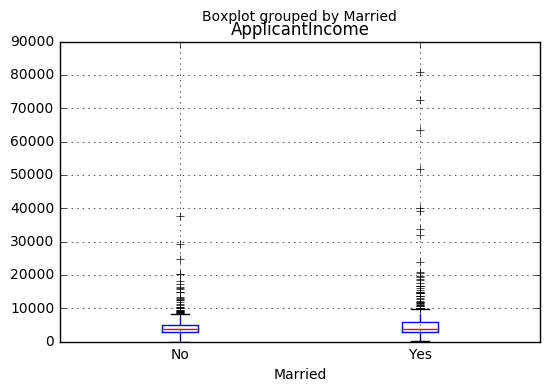

In [78]:
combine_clean.boxplot(column='ApplicantIncome',by='Married')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D68EB12C50>]], dtype=object)

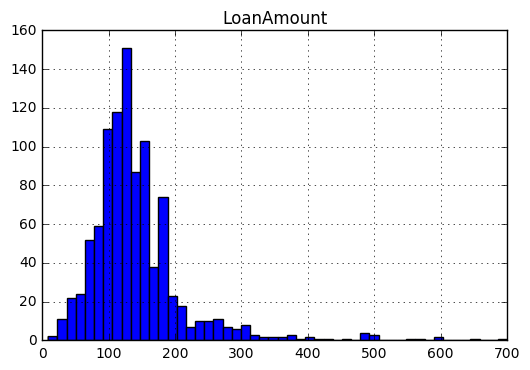

In [79]:
combine_clean.hist(column='LoanAmount',bins=50)

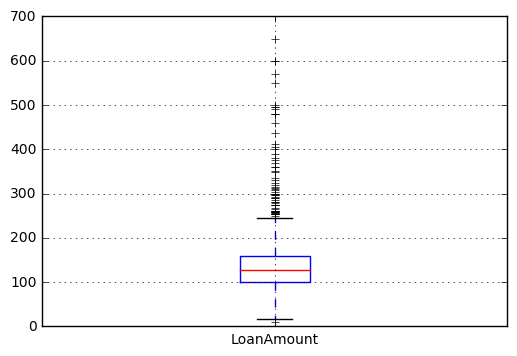

In [80]:
combine_clean.boxplot(column='LoanAmount')

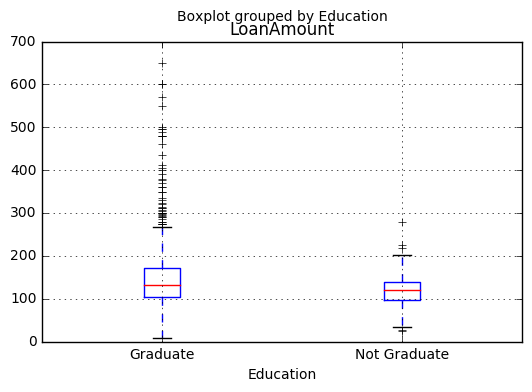

In [81]:
combine_clean.boxplot(column='LoanAmount',by='Education')

####  Categorical Variable Analysis, frequency analysis 

In [82]:
pd.crosstab(combine_clean.Credit_History,combine_clean.Loan_Status,margins=True).apply(lambda x:x/float(x[-1]),axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.209524,0.790476,1.0
All,0.312704,0.687296,1.0


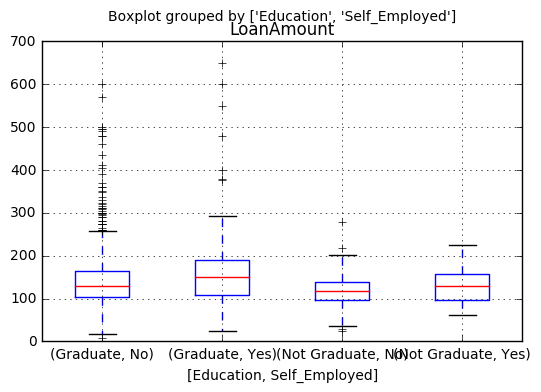

In [83]:
combine_clean.boxplot(column='LoanAmount',by=['Education','Self_Employed'])

## Modeling

#### Transform categorical var to numerical var

In [84]:
combine_clean.dtypes.index

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID',
       'Loan_Status', 'Married', 'Property_Area', 'Self_Employed', 'source',
       'Loan_Amount_Term_Combined'],
      dtype='object')

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le=LabelEncoder()

In [87]:
var_mod=['Credit_History', 'Dependents','Education', 'Gender','Married', 'Property_Area', 'Self_Employed','Loan_Amount_Term_Combined']

In [88]:
for col in var_mod:
    combine_clean[col]=le.fit_transform(combine_clean[col])

In [89]:
combine_clean.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source,Loan_Amount_Term_Combined
0,5849,0.0,1,0,0,1,126.601036,360.0,LP001002,Y,0,2,0,train,0
1,4583,1508.0,1,1,0,1,128.000000,360.0,LP001003,N,1,0,0,train,0
2,3000,0.0,1,0,0,1,66.000000,360.0,LP001005,Y,1,2,1,train,0
3,2583,2358.0,1,0,1,1,120.000000,360.0,LP001006,Y,1,2,0,train,0
4,6000,0.0,1,0,0,1,141.000000,360.0,LP001008,Y,0,2,0,train,0


In [90]:
combine_dummies=pd.get_dummies(combine_clean,columns=var_mod)

In [91]:
combine_dummies.dtypes

ApplicantIncome                  int64
CoapplicantIncome              float64
LoanAmount                     float64
Loan_Amount_Term                object
Loan_ID                         object
Loan_Status                     object
source                          object
Credit_History_0                 uint8
Credit_History_1                 uint8
Dependents_0                     uint8
Dependents_1                     uint8
Dependents_2                     uint8
Dependents_3                     uint8
Education_0                      uint8
Education_1                      uint8
Gender_0                         uint8
Gender_1                         uint8
Married_0                        uint8
Married_1                        uint8
Property_Area_0                  uint8
Property_Area_1                  uint8
Property_Area_2                  uint8
Self_Employed_0                  uint8
Self_Employed_1                  uint8
Loan_Amount_Term_Combined_0      uint8
Loan_Amount_Term_Combined

In [92]:
combine_dummies.drop(['Loan_Amount_Term'],axis=1,inplace=True)

In [115]:
train_mod=combine_dummies.loc[combine_dummies.source=='train']

In [116]:
test_mod=combine_dummies.loc[combine_dummies.source=='test']

In [117]:
train_mod.drop('source',axis=1,inplace=True)

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [118]:
test_mod.drop(['source','Loan_Status'],axis=1,inplace=True)

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
test_mod.to_csv('test_mod.csv',index=False)
train_mod.to_csv('train_mod.csv',index=False)

In [120]:
combine_dummies.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_0,Credit_History_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,...,Gender_1,Married_0,Married_1,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1,Loan_Amount_Term_Combined_0,Loan_Amount_Term_Combined_1
ApplicantIncome,1.000000,-0.114247,0.547547,-0.020201,0.020201,-0.093441,0.027478,-0.021144,0.150853,0.138909,...,0.060444,-0.052126,0.052126,-0.000099,-0.009034,0.009171,-0.113106,0.113106,-0.039015,0.039015
CoapplicantIncome,-0.114247,1.000000,0.178786,0.011531,-0.011531,-0.003330,-0.007011,0.018375,-0.008810,0.060380,...,0.082428,-0.061606,0.061606,0.035925,-0.026793,-0.007484,0.018861,-0.018861,-0.037220,0.037220
LoanAmount,0.547547,0.178786,1.000000,0.003454,-0.003454,-0.137175,0.039785,0.053040,0.115084,0.162390,...,0.098228,-0.160235,0.160235,0.036330,-0.008166,-0.026585,-0.108287,0.108287,0.040088,-0.040088
Credit_History_0,-0.020201,0.011531,0.003454,1.000000,-1.000000,-0.017282,-0.031904,0.006640,0.061567,-0.062416,...,-0.018627,0.021738,-0.021738,0.026518,-0.009830,-0.015517,0.034485,-0.034485,-0.007120,0.007120
Credit_History_1,0.020201,-0.011531,-0.003454,-1.000000,1.000000,0.017282,0.031904,-0.006640,-0.061567,0.062416,...,0.018627,-0.021738,0.021738,-0.026518,0.009830,0.015517,-0.034485,0.034485,0.007120,-0.007120
Dependents_0,-0.093441,-0.003330,-0.137175,-0.017282,0.017282,1.000000,-0.519882,-0.519882,-0.376567,0.057978,...,-0.118262,0.360296,-0.360296,0.029423,0.000937,-0.029116,0.045207,-0.045207,0.085347,-0.085347
Dependents_1,0.027478,-0.007011,0.039785,-0.031904,0.031904,-0.519882,1.000000,-0.194884,-0.141161,0.023597,...,-0.016439,-0.118849,0.118849,-0.050177,0.017742,0.030225,-0.047252,0.047252,-0.037940,0.037940
Dependents_2,-0.021144,0.018375,0.053040,0.006640,-0.006640,-0.519882,-0.194884,1.000000,-0.141161,-0.042769,...,0.118421,-0.245805,0.245805,0.022380,-0.028364,0.007065,-0.013448,0.013448,-0.012111,0.012111
Dependents_3,0.150853,-0.008810,0.115084,0.061567,-0.061567,-0.376567,-0.141161,-0.141161,1.000000,-0.074190,...,0.071256,-0.148371,0.148371,-0.014639,0.011934,0.002029,0.000417,-0.000417,-0.081413,0.081413
Education_0,0.138909,0.060380,0.162390,-0.062416,0.062416,0.057978,0.023597,-0.042769,-0.074190,1.000000,...,-0.040649,0.026211,-0.026211,-0.051345,0.013089,0.036017,-0.010848,0.010848,0.035705,-0.035705


# Model selection

## [Scoring Paramater]http://scikit-learn.org/stable/modules/model_evaluation.html

### E.g: (metrics.accuracy_score) _for classification_
### E.g: (metrics.mean_squared_error) _for Regression_
### E.g: (metrics.adjusted_rand_score) _for Clustering_

In [227]:
#Define target and ID columns:
target = 'Loan_Status'
IDcol = ['Loan_ID']
from sklearn import cross_validation, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    

        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20)
    
    print ('Cross_Validation_Score:%.4g' %cv_score.mean())
    #Print model report:
    print ("\nModel Report")
    
    print ("Training_Accuracy : %.6g" % metrics.accuracy_score(dtrain_predictions,dtrain[target]))
    
    
    
    #Predict on testing data:
    dtest_predictions= alg.predict(dtest[predictors])
    
    print ("Testing_Accuracy : %.4g" % metrics.accuracy_score(dtest_predictions,dtest[target]))

    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

#### Logistic Regression 

In [228]:
from sklearn.linear_model import LogisticRegression
predictors= [x for x in train_mod.columns if x not in [target]+IDcol]
Log=LogisticRegression()
modelfit(Log,train_mod,test_mod,predictors,target,IDcol,'Log1.csv')


Cross_Validation_Score:0.8117

Model Report
Training_Accuracy : 0.812704
Testing_Accuracy : 1


#### Decision Tree 

In [234]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
predictors= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History_0', 'Credit_History_1', 'Dependents_3', 'Education_0',
       'Education_1', 'Married_0', 'Married_1',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2',
       'Self_Employed_0', 'Self_Employed_1', 'Loan_Amount_Term_Combined_0',
       'Loan_Amount_Term_Combined_1']
Decision=DecisionTreeClassifier(max_depth=20,min_samples_leaf=75)
modelfit(Decision,train_mod,test_mod,predictors,target,IDcol,'Decision1.csv')


Cross_Validation_Score:0.81

Model Report
Training_Accuracy : 0.809446
Testing_Accuracy : 0.9946


#### Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier
predictors=[x for x in train_mod.columns if x not in [target]+IDcol]
RandomForest=RandomForestClassifier(n_estimators=30,max_depth=7,min_samples_leaf=30,n_jobs=4)
modelfit(RandomForest,train_mod,test_mod,predictors,target,IDcol,'random1.csv')


Cross_Validation_Score:0.81

Model Report
Training_Accuracy : 0.809446
Testing_Accuracy : 0.9946


In [242]:
from sklearn.ensemble import RandomForestClassifier
predictors=[x for x in train_mod.columns if x not in [target]+IDcol]
RandomForest=RandomForestClassifier(n_estimators=30,max_depth=7,min_samples_leaf=25,n_jobs=4)
modelfit(RandomForest,train_mod,test_mod,predictors,target,IDcol,'random2.csv')

Cross_Validation_Score:0.81

Model Report
Training_Accuracy : 0.809446
Testing_Accuracy : 0.9946


####  GradiantBoosting

In [246]:
from sklearn.ensemble import GradientBoostingClassifier
predictors=[x for x in train_mod.columns if x not in [target]+IDcol]
GBM=GradientBoostingClassifier(n_estimators=30,learning_rate=0.1,max_depth=7,subsample=0.2)
modelfit(GBM,train_mod,test_mod,predictors,target,IDcol,'GBM1.csv')

Cross_Validation_Score:0.779

Model Report
Training_Accuracy : 0.882736
Testing_Accuracy : 0.9292


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

In [134]:
train_mod.dtypes.index


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_ID',
       'Loan_Status', 'Credit_History_0', 'Credit_History_1', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_0',
       'Education_1', 'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2',
       'Self_Employed_0', 'Self_Employed_1', 'Loan_Amount_Term_Combined_0',
       'Loan_Amount_Term_Combined_1'],
      dtype='object')

In [145]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History_0', 'Credit_History_1', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_0',
       'Education_1', 'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2',
       'Self_Employed_0', 'Self_Employed_1', 'Loan_Amount_Term_Combined_0',
       'Loan_Amount_Term_Combined_1']
classification_model(model,train_mod,predictor_var,outcome_var)


Accuracy : 81.270%
Cross-Validation Score : 80.946%


In [164]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier(max_depth=15,min_samples_leaf=75)
predictor_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History_0', 'Credit_History_1', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_0',
       'Education_1', 'Gender_0', 'Gender_1', 'Married_0', 'Married_1',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2',
       'Self_Employed_0', 'Self_Employed_1', 'Loan_Amount_Term_Combined_0',
       'Loan_Amount_Term_Combined_1']
classification_model(model,train_mod,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 70.355%


In [182]:
#data.loc[miss_bool,'LoanAmount']=data.loc[miss_bool,(['Gender','Married','Self_Employed'])].apply(
#        lambda x: impute_groups.loc[x])

In [183]:
#---------------------------------------------------------------

In [258]:
df1 = pd.DataFrame(np.random.randn(6,4),
                   columns=[('a','1'), ('b','2'), ('c','3'), 'nontuple'])

In [259]:
#Note: A difference between loc and iloc
df1
qgrid.show_grid(df1)

In [186]:
df1.loc[0:2]

,"(a, 1)","(b, 2)","(c, 3)",nontuple
0,0.916051,2.029853,1.559955,0.113920
1,-0.206567,0.245048,0.155337,0.624901
2,-0.090727,2.048831,-0.297909,0.730775


In [187]:
#-------------------------------------------------------------------------------------

In [188]:
data.apply(lambda x: sum(x.isnull()))

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [189]:
data.loc[data['LoanAmount'].isnull(),:]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,


In [190]:
#crosstab:frequency table 
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [191]:
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True).apply(lambda x: x/float(x[-1]),axis=1)
    

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [192]:
#Merge  DataFrames
property_rate=pd.DataFrame([1000,5000,12000],index=['Rural','Semiurban','Urban'],
                          columns=['rates'])

In [193]:
data_merged=data.merge(right=property_rate,how='inner',left_on='Property_Area',right_index=True,sort=False)

In [194]:
data_merged.pivot_table(values='Gender',index=['Property_Area','rates'],aggfunc=len)

Property_Area  rates
Rural          1000     179
Semiurban      5000     233
Urban          12000    202
Name: Gender, dtype: int64

In [195]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'],ascending=False)

In [196]:
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


In [197]:
import matplotlib.pyplot as plt

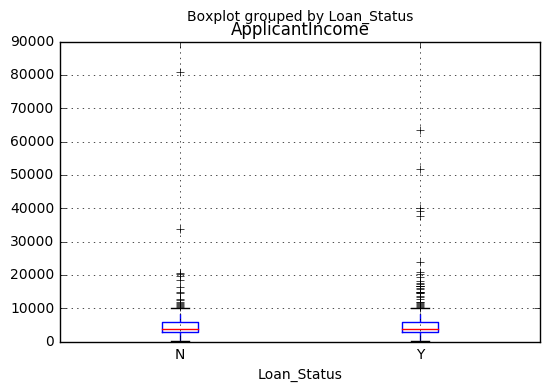

In [198]:
%matplotlib inline
data.boxplot(column='ApplicantIncome',by='Loan_Status')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002214563FC88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000221456C0C50>], dtype=object)

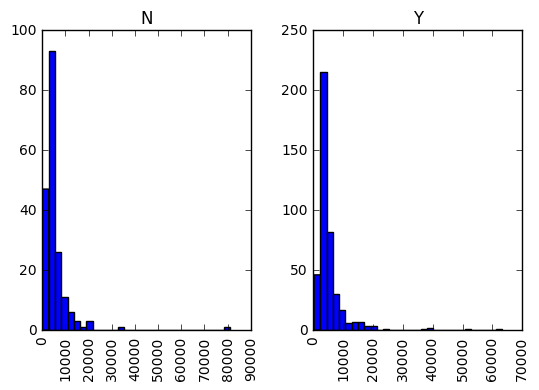

In [187]:
combine_clean.hist(column='ApplicantIncome',by='Loan_Status',bins=30)

In [200]:
data.describe()

C:\Users\zfang\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.393783,342.00000,0.842199
std,6109.041673,2926.248369,84.082713,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,NaN,NaN
50%,3812.500000,1188.500000,128.000000,NaN,NaN
75%,5795.000000,2297.250000,165.000000,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [201]:

#To cluster numerical variable; Create Binning for numerical variable
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

In [204]:
#[data['LoanAmount'].max()]+[data['LoanAmount'].min()]

In [205]:
#range(len([data['LoanAmount'].max()]+[data['LoanAmount'].min()])+1)